In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
import csv
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords


/home/frunkad/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
wordProc =  tf.keras.preprocessing.text.text_to_word_sequence
stopWords = stopwords.words('english')
pd.options.display.max_rows = 10

# sess = tf.Session()
# tf.keras.backend.set_session(sess)
# writer = tf.summary.FileWriter('/tmp/hackerearth-happines/1')

# tensorboard = tf.keras.callbacks.TensorBoard(log_dir='/tmp/hackerearth-happines/1', histogram_freq=1,write_graph=True, write_images=False)

In [15]:

data = pd.read_csv("train.csv",sep=",")

# test.csv
testdata = pd.read_csv("test.csv",sep=",")
data.head()
data.shape,testdata.shape

((38932, 5),
 (29404, 4),
    User_ID                                        Description  \
 0  id80132  Looking for a motel in close proximity to TV t...   
 1  id80133  Walking distance to Madison Square Garden and ...   
 2  id80134  Visited Seattle on business. Spent - nights in...   
 3  id80135  This hotel location is excellent and the rooms...   
 4  id80136  This hotel is awesome I love the service Antho...   
 
        Browser_Used Device_Used  
 0           Firefox      Mobile  
 1  InternetExplorer     Desktop  
 2                IE      Tablet  
 3              Edge      Mobile  
 4           Mozilla      Mobile  )

In [16]:
np.unique(data['Is_Response'])
data['Is_Response'] = data['Is_Response'].apply(lambda x: 1 if x == "happy" else 0)
# testdata['Is_Response'] = testdata['Is_Response'].apply(lambda x: 1 if x == "happy" else 0)

In [17]:
def text_to_tokens(s):
    seq = wordProc(s.lower())
    return np.array([word for word in seq if word not in stopWords])

data['Description'] = data['Description'].apply(text_to_tokens)
testdata['Description'] = testdata['Description'].apply(text_to_tokens)
    
    
def rearrange_browser(s):
    if s in ['Chrome','Google Chrome']:
        return 0
    elif s in ['Edge']:
        return 1
    elif s in ['Firefox','Mozilla','Mozilla Firefox']:
        return 2
    elif s in ['IE','Internet Explorer','InternetExplorer']:
        return 3
    elif s in ['Opera']:
        return 4
    else:
        return 5
data['Browser_Used'] = data['Browser_Used'].apply(rearrange_browser)

uniqD,countsD = np.unique(data['Device_Used'],return_counts=True)
deviceDict = dict(zip(uniqD,[i for i in range(len(uniqD))]))
data['Device_Used'] = data['Device_Used'].apply(lambda x: deviceDict[x])


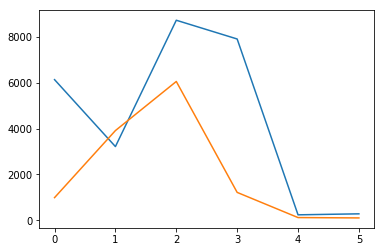

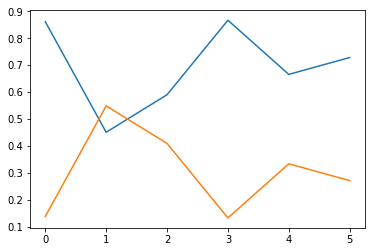

In [7]:
# Are Browser_User and Device_User useful ?

uniqB,countsB = np.unique(data['Browser_Used'],return_counts=True)
# These are number of response, we will do fraction in next

# Customers who were happy
q = [np.count_nonzero((data['Is_Response'] == 1) & (data['Browser_Used'] == x)) for x in np.unique(data['Browser_Used'])]
plt.plot(np.unique(data['Browser_Used']),q)
# Customers who were not happy
q = [np.count_nonzero((data['Is_Response'] == 0) & (data['Browser_Used'] == x)) for x in np.unique(data['Browser_Used'])]
plt.plot(np.unique(data['Browser_Used']),q)
plt.show()

# Customers who were happy
q = [np.count_nonzero((data['Is_Response'] == 1) & (data['Browser_Used'] == x))/countsB[x] for x in np.unique(data['Browser_Used'])]
plt.plot(np.unique(data['Browser_Used']),q)
# Customers who were not happy
q = [np.count_nonzero((data['Is_Response'] == 0) & (data['Browser_Used'] == x))/countsB[x]  for x in np.unique(data['Browser_Used'])]
plt.plot(np.unique(data['Browser_Used']),q)
plt.show()

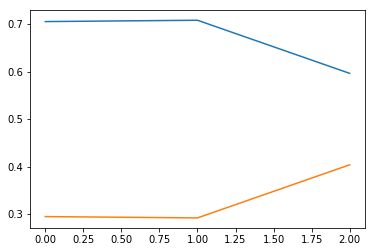

In [8]:

q = [np.count_nonzero((data['Is_Response'] == 1) & (data['Device_Used'] == x))/countsD[x] for x in np.unique(data['Device_Used'])]
plt.plot(np.unique(data['Device_Used']),q)
# Customers who were not happy
q = [np.count_nonzero((data['Is_Response'] == 0) & (data['Device_Used'] == x))/countsD[x]  for x in np.unique(data['Device_Used'])]
plt.plot(np.unique(data['Device_Used']),q)
plt.show()

Won't be using Device and Browser info


In [43]:

type(data['Description'])
totalData = data['Description'].append(testdata['Description'])
uniqueWords = np.unique(np.hstack(totalData))
len(uniqueWords)

66319

In [26]:
totalData

0        [room, kind, clean, strong, smell, dogs, gener...
1        [stayed, crown, plaza, april, april, staff, fr...
2        [booked, hotel, hotwire, lowest, price, could,...
3        [stayed, husband, sons, way, alaska, cruise, l...
4        [girlfriends, stayed, celebrate, th, birthdays...
                               ...                        
29399    [stayed, hotel, towers, conference, loved, pla...
29400    [trying, stay, within, marriott, family, wanti...
29401    [stayed, nights, little, dog, friendly, staff,...
29402    [stayed, yotel, weekend, impressed, thing, lik...
29403    [blakely, comfortable, every, way, rooms, nice...
Name: Description, Length: 68336, dtype: object

In [44]:

avg = np.mean([len(i) for i in testdata['Description']])
print("Unique Words: {}\nAverage Words: {}".format(len(uniqueWords),avg))
# data['Description'].apply(lambda x: len(x)) # Length
uniqs = dict(zip(uniqueWords,range(len(uniqueWords))))

Unique Words: 66319
Average Words: 78.85467963542375


In [11]:
# Convert to one hot
# def conv(sent):
#     conv.counter += 1
#     if(conv.counter%1000 == 0):
#         print(conv.counter,end=' ')
#     nw = np.zeros((len(uniqueWords)),dtype=np.float32)
#     for word in sent:
#         nw[uniqs[word]] = 1.
#     return nw
# conv.counter = 0
# data['Description'] = data['Description'].apply(conv)


In [45]:
def vectorize_sequences(sequences, dimension=len(uniqueWords)):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension), dtype=np.float32)
    for i, sequence in enumerate(sequences):
      
#         results[i, sequence] = 1.  # set specific indices of results[i] to 1s
        for s in sequence:
            results[i,uniqs[s]] = 1
    return results
training_data = vectorize_sequences(data['Description'])
testing_data = vectorize_sequences(testdata['Description'])

In [46]:
training_label = np.expand_dims(data['Is_Response'],-1)

In [47]:
training_data,training_label

(array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [1]]))

In [49]:
model= tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(len(uniqueWords),)))
model.add(tf.keras.layers.Dense(32, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(16, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))

optimizer = tf.train.RMSPropOptimizer(learning_rate=0.001)

model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['binary_accuracy'])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                1061120   
_________________________________________________________________
dense_6 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 1,062,209
Trainable params: 1,062,209
Non-trainable params: 0
_________________________________________________________________


In [50]:
VAL_SIZE = 8000

val_data = training_data[:VAL_SIZE]
partial_train_data = training_data[VAL_SIZE:]


val_labels = training_label[:VAL_SIZE]
partial_train_labels = training_label[VAL_SIZE:]

In [51]:
model.fit(training_data,training_label,epochs=5)

Epoch 1/5
38932/38932 [==============================] - 10s 247us/step - loss: 0.3829 - binary_accuracy: 0.8417
Epoch 2/5
38932/38932 [==============================] - 8s 207us/step - loss: 0.2755 - binary_accuracy: 0.8964
Epoch 3/5
38932/38932 [==============================] - 8s 207us/step - loss: 0.2530 - binary_accuracy: 0.9064
Epoch 4/5
38932/38932 [==============================] - 8s 207us/step - loss: 0.2383 - binary_accuracy: 0.9128
Epoch 5/5
38932/38932 [==============================] - 8s 207us/step - loss: 0.2265 - binary_accuracy: 0.9195


In [ ]:
loss,acc= model.evaluate(val_data,val_labels)
print("Loss: {}\nAccuracy: {}".format(loss,acc))



In [52]:
re = model.predict(testing_data)


In [60]:
with open("submission.csv","w") as f:
    f.write("User_ID, Is_Response\n")
    for i in range(len(re)):
        f.write("{},{}\n".format(testdata['User_ID'][i],"not_happy" if round(re[i][0]) == 0. else "happy"))